 **Bank Churn Dataset**\

**Prediction of best fit Binary Classification Model and Complete Exploratory Data Analysis**\
Performed by : Ishrat Un Nisa\
Dated : January 2024\
email : ishratbadar@gmail.com

# About Dataset
The dataset for this competition (both train and test) was generated from a deep learning model trained on the Bank Customer Churn Prediction dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

## Files

train.csv - the training dataset; Exited is the binary target

test.csv - the test dataset; your objective is to predict the probability of Exited

sample_submission.csv - a sample submission file in the correct format

# Objective:
Exploratory Data Analysis (EDA) to analyze data for checking patterns and getting insight from it

Kernel : Python 3.12.1

## To do list
1. Import libraries
2. Load dataset
3. Analyze and understanding dataset (Anomalies, relationship, missing values, duplicate values etc)
4. Remove anamolies from data by dealing missing data, duplicate data and other information
5. Feature engineering
6. Getting insight from data by applying various techniques 
7. Modeling and predicting 

# 1. Import following libraries
 - Panadas
 - Numpy
 - Matplotlib
 - Seaborn
 - Scipy

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# import all relevant libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
# To show the plot in the notebook itself instead of opening a new window for the plot
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
'''
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
'''
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"\nimport os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

# 2. Load Dataset

In [2]:
# load dataset
df_train = pd.read_csv('./Data/train.csv')
df_test = pd.read_csv('./Data/test.csv')
# df_train = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')
# df_test = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')

# To check complete dataset (column wise and row wise)
pd.set_option('display.max_columns', None)    # this is to display all the columns in the dataframe
# pd.set_option('display.max_rows', None)       # this is to display all the rows in the dataframe

# 3. Analyze data

In [3]:
# check the shape of training and test dataset
print('shape of training data set: ', df_train.shape)
print('shape of test data set: ', df_test.shape)

shape of training data set:  (165034, 14)
shape of test data set:  (110023, 13)


In [4]:
# To check data from training dataset
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [5]:
# to check details of training dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [6]:
# to check details of test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


---
# Observation 1
1. There are 165034 rows and 14 columns in the training dataset
2. There are 110023 rows and 13 columns in the test dataset 
3. No missing value in both Training and Test Dataset

In [7]:
# Checking for missing values in Training dataset
df_train.isnull().sum().any()

False

In [8]:
df_train.loc[:, df_train.isna().any()].isna().sum().sort_values(ascending=False)

Series([], dtype: float64)

In [9]:
df_test.loc[:, df_test.isna().any()].isna().sum().sort_values(ascending=False)

Series([], dtype: float64)

In [10]:
# Check null/missing values inside dataset in descending order
df_train.isnull().sum().sort_values(ascending=False)

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<Axes: >

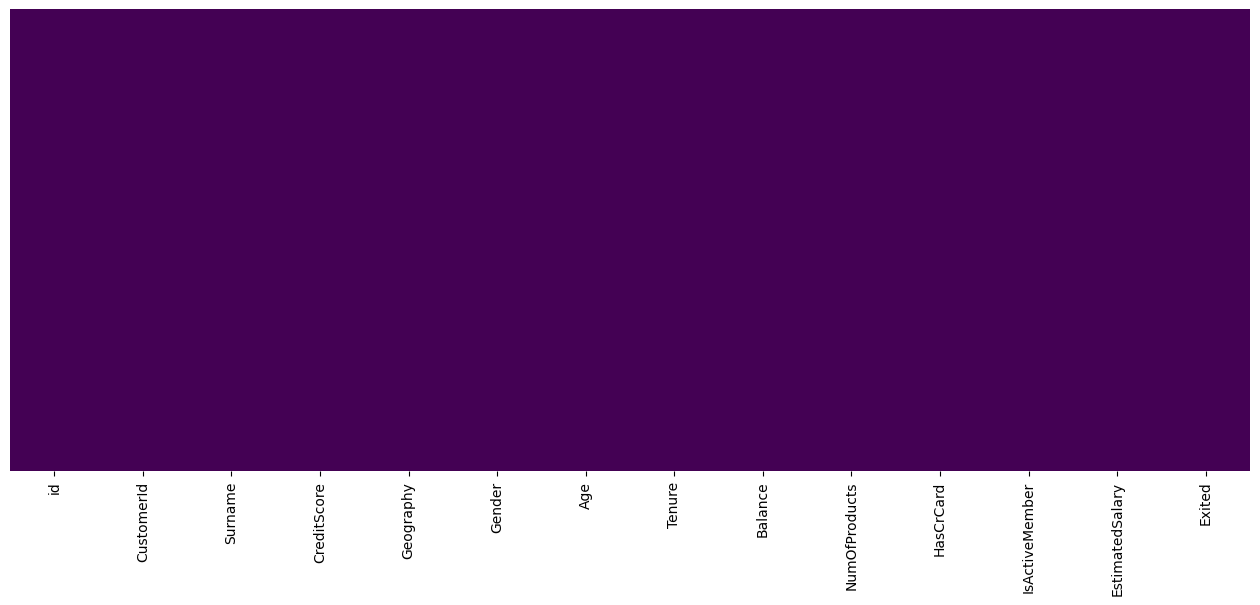

In [11]:
# Plot missing values in Training dataset
plt.figure(figsize = (16,6))
sns.heatmap(df_train.isnull(), yticklabels= False, cbar= False, cmap='viridis')

<Axes: >

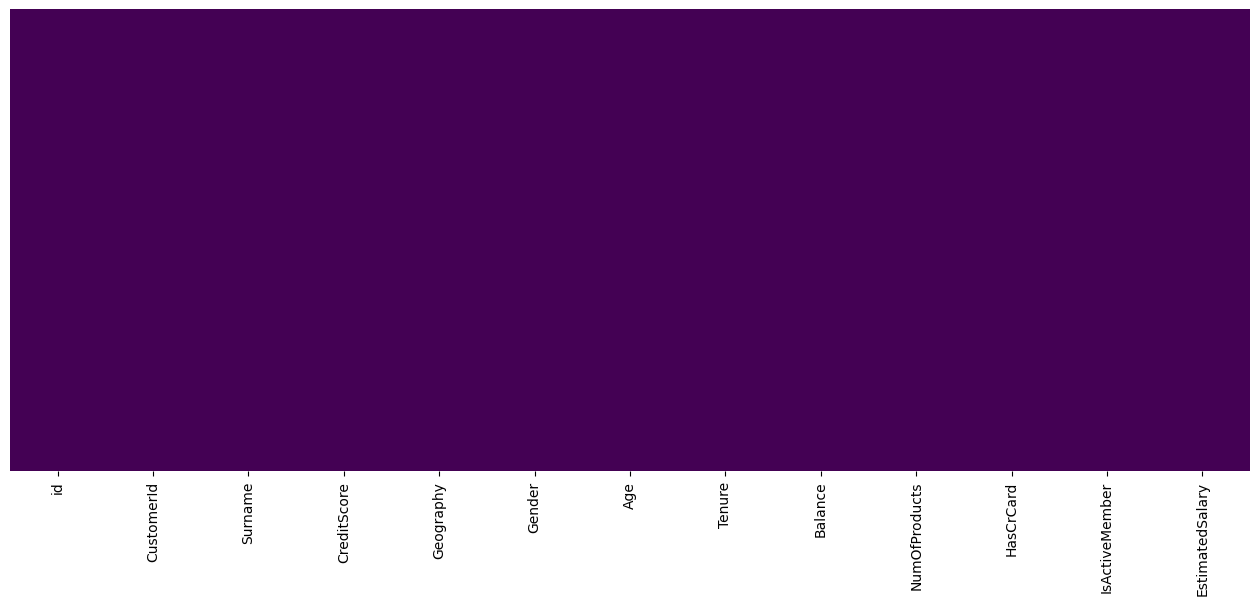

In [12]:
# Plot missing values in Test dataset
plt.figure(figsize = (16,6))
sns.heatmap(df_test.isnull(), yticklabels= False, cbar= False, cmap='viridis')

In [13]:
# Checking for missing values in test dataset
df_test.isnull().sum().any()

False

In [14]:
# find missing values in Training dataset according to their percentage
missing_perc = (df_train.isnull().sum()/len(df_train)*100).sort_values(ascending=False)
missing_perc[missing_perc != 0]

Series([], dtype: float64)

In [15]:
# find missing values in Test dataset according to their percentage
missing_perc_test = (df_test.isnull().sum()/len(df_test)*100).sort_values(ascending=False)
missing_perc_test[missing_perc_test != 0]

Series([], dtype: float64)

In [16]:
# check any duplication
df_train.duplicated(subset=df_train.columns.difference(['id'])).any()

False

In [17]:
# check any duplication
df_train.duplicated(subset=df_train.columns.difference(['id'])).sum()

0

In [18]:
df_train.duplicated(subset=df_train.columns).sum()

0

In [19]:
df_test.duplicated(subset=df_test.columns.difference(['id'])).sum()

0

---
# Observation 2
1. There is no Duplicate value seen in Training and Test Dataset

In [20]:
# Find the Structure or size of Training Dataset and check the Descriptive Analysis
print('Shape of dataset : ',df_train.shape)
df_train.describe()

Shape of dataset :  (165034, 14)


,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [21]:
# Find the Structure or size of Test Dataset and check the Descriptive Analysis
print('Shape of dataset : ',df_test.shape)
df_test.describe()

Shape of dataset :  (110023, 13)


,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,110023.000000,1.100230e+05,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000
mean,220045.000000,1.569210e+07,656.530789,38.122205,4.996637,55333.611354,1.553321,0.753043,0.495233,112315.147765
std,31761.048671,7.168499e+04,80.315415,8.861550,2.806148,62788.519675,0.544714,0.431244,0.499980,50277.048244
min,165034.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,192539.500000,1.563286e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74440.325000
50%,220045.000000,1.569018e+07,660.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117832.230000
75%,247550.500000,1.575693e+07,710.000000,42.000000,7.000000,120145.605000,2.000000,1.000000,1.000000,154631.350000
max,275056.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000


# 4. Remove Anamolies from Dataset

In [22]:
df_train.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Check Unique values in all the columns along with maximum and minimum values in the Numerical columns

In [23]:
# Check Unique values, data type of each column and Minimum and Maximum values of Numerical columns
for column in df_train.columns:
    unique_values = df_train[column].unique()
    type_value = df_train[column].dtype
    if len(unique_values) > 10:
        unique_values = unique_values[:10]
    total_unique_values = df_train[column].nunique()
    print(f"Data Type of {column}: {type_value}")
    print(f"Total Unique values in {column}: {total_unique_values}")
    if (df_train[column].dtype == 'int64') or (df_train[column].dtype == 'float64'):
       print(f"Minimum value: {df_train[column].min()},   Maximum value: {df_train[column].max()}")
    print(f"Unique values in {column}: {unique_values}\n")
    

Data Type of id: int64
Total Unique values in id: 165034
Minimum value: 0,   Maximum value: 165033
Unique values in id: [0 1 2 3 4 5 6 7 8 9]

Data Type of CustomerId: int64
Total Unique values in CustomerId: 23221
Minimum value: 15565701,   Maximum value: 15815690
Unique values in CustomerId: [15674932 15749177 15694510 15741417 15766172 15771669 15692819 15669611
 15691707 15591721]

Data Type of Surname: object
Total Unique values in Surname: 2797
Unique values in Surname: ['Okwudilichukwu' 'Okwudiliolisa' 'Hsueh' 'Kao' 'Chiemenam' 'Genovese'
 "Ch'ang" 'Chukwuebuka' 'Manna' 'Cattaneo']

Data Type of CreditScore: int64
Total Unique values in CreditScore: 457
Minimum value: 350,   Maximum value: 850
Unique values in CreditScore: [668 627 678 581 716 588 593 676 583 599]

Data Type of Geography: object
Total Unique values in Geography: 3
Unique values in Geography: ['France' 'Spain' 'Germany']

Data Type of Gender: object
Total Unique values in Gender: 2
Unique values in Gender: ['Male

Age
Minimum value: 18.0,   Maximum value: 92.0
Skew : 0.97


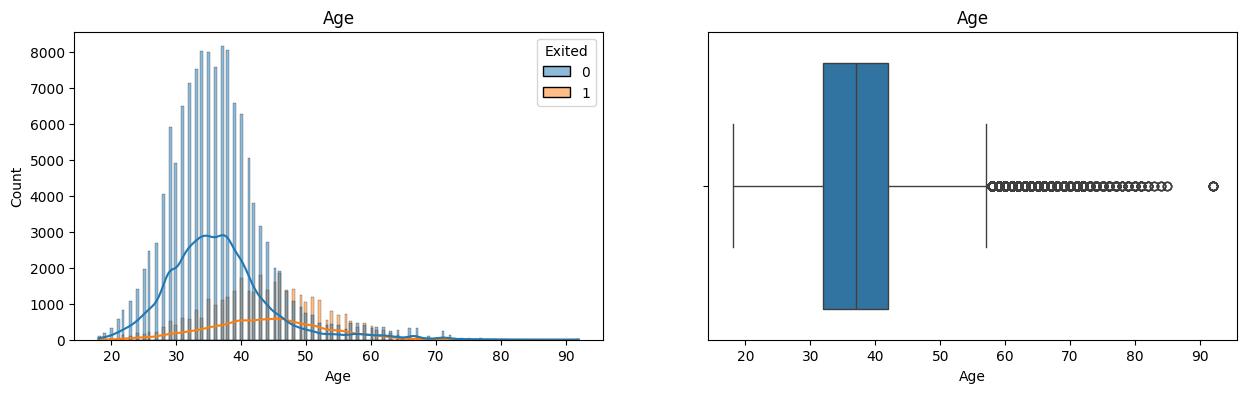

Balance
Minimum value: 0.0,   Maximum value: 250898.09
Skew : 0.38


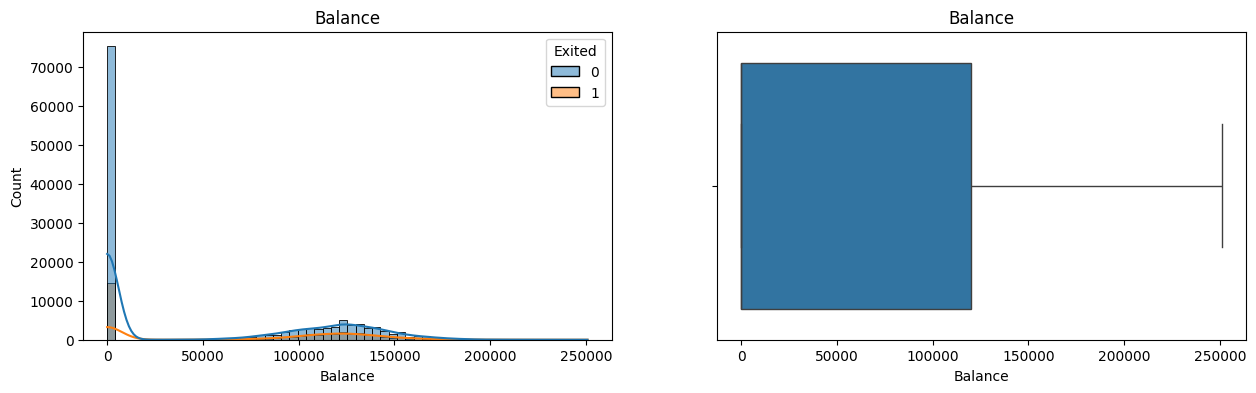

CreditScore
Minimum value: 350,   Maximum value: 850
Skew : -0.06


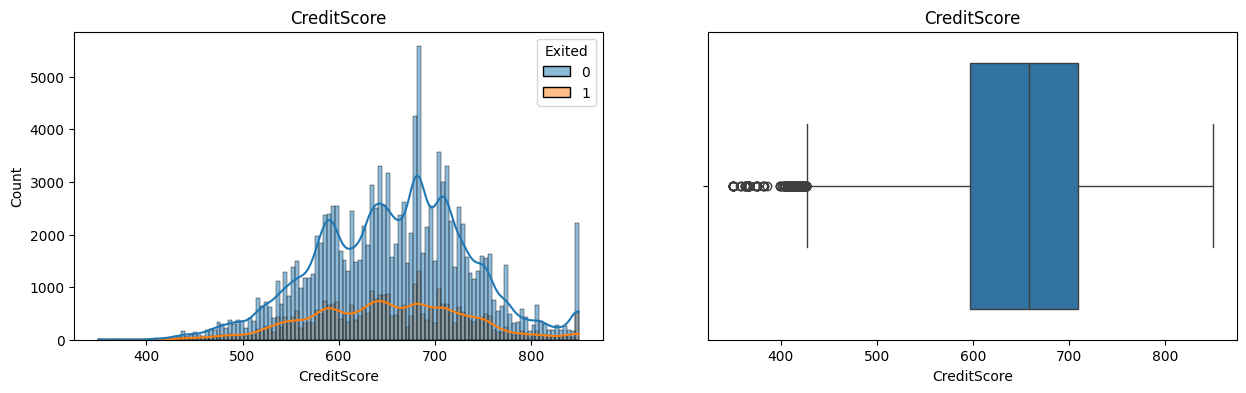

EstimatedSalary
Minimum value: 11.58,   Maximum value: 199992.48
Skew : -0.31


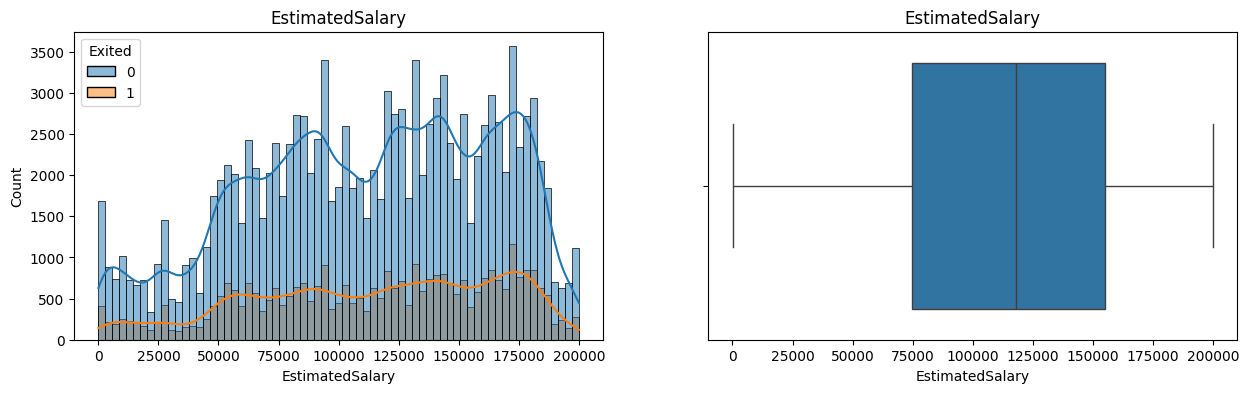

Exited
Minimum value: 0,   Maximum value: 1
Skew : 1.41


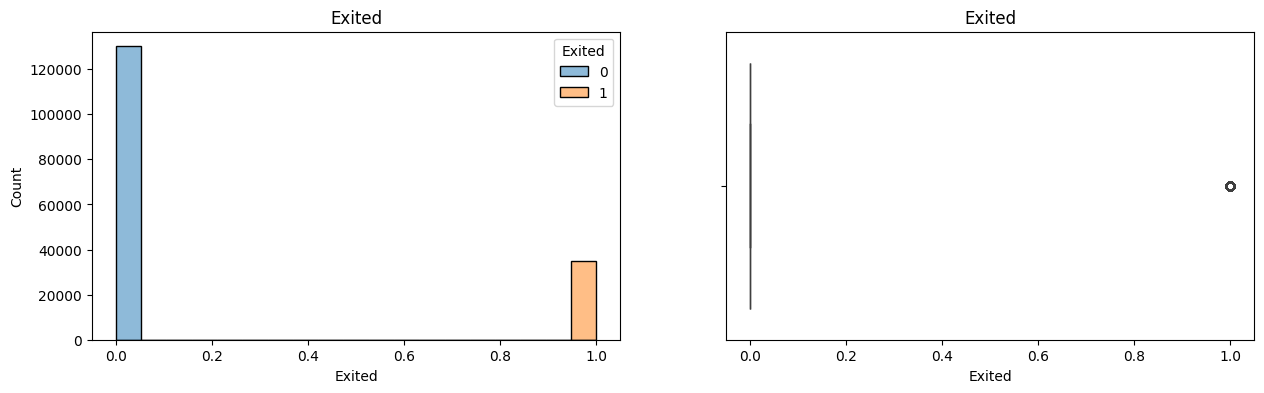

HasCrCard
Minimum value: 0.0,   Maximum value: 1.0
Skew : -1.18


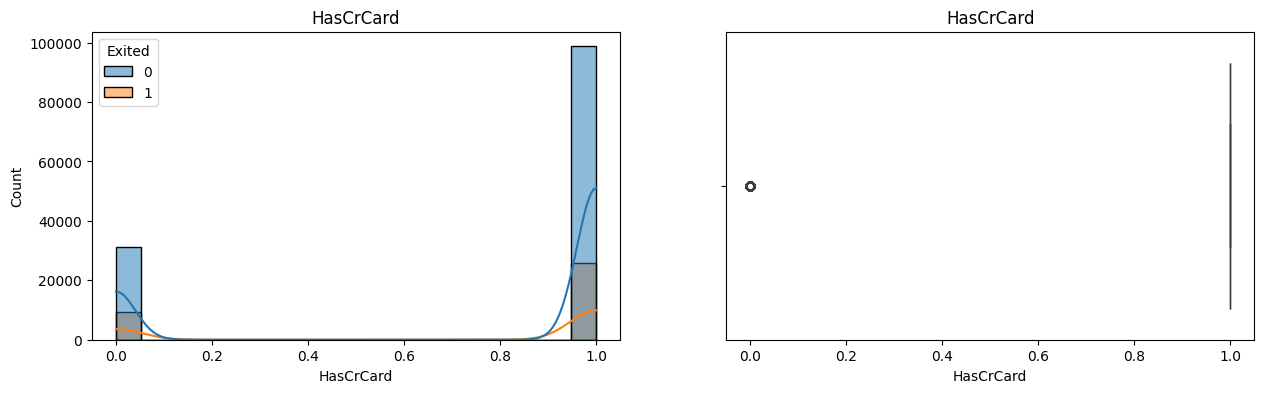

IsActiveMember
Minimum value: 0.0,   Maximum value: 1.0
Skew : 0.01


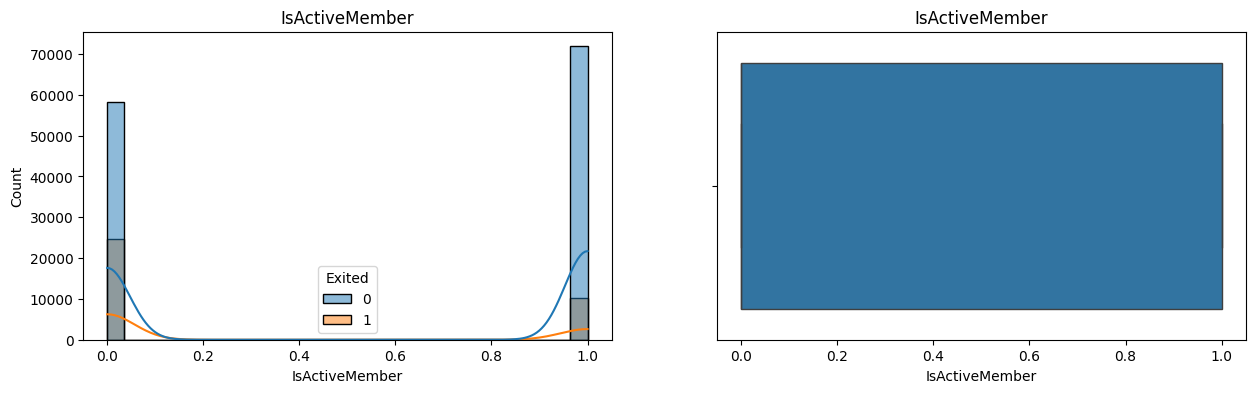

NumOfProducts
Minimum value: 1,   Maximum value: 4
Skew : 0.37


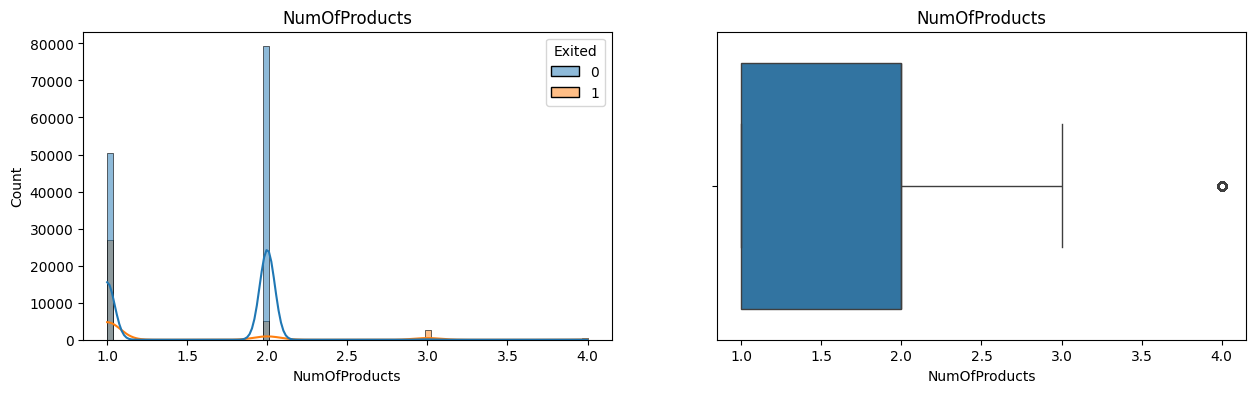

Tenure
Minimum value: 0,   Maximum value: 10
Skew : 0.01


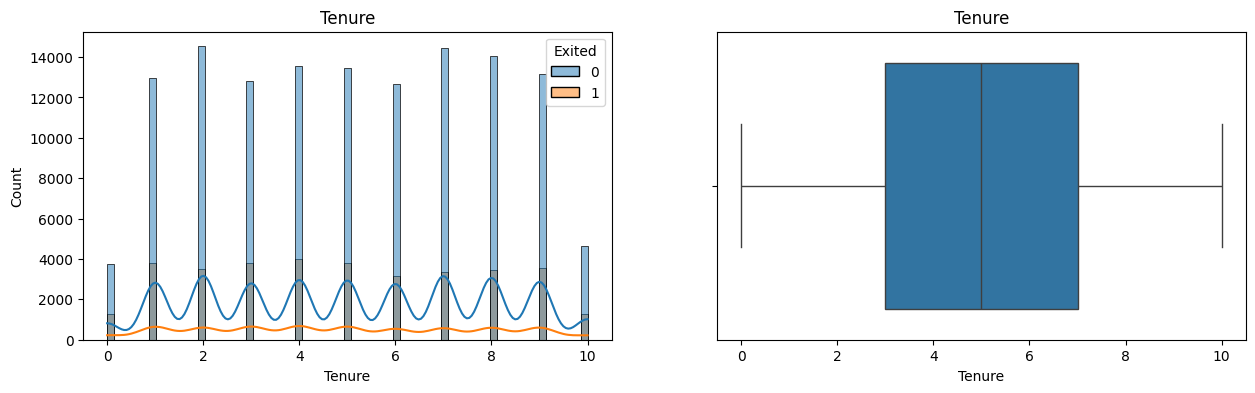

In [24]:
# Lets separate Numerical and categorical columns to visualize properly

num_col_train = df_train.select_dtypes(include=np.number).columns.difference(['id','CustomerId'])
cat_col_train = df_train.select_dtypes(include=['object','category']).columns
# Visualize Numerical columns

for col in num_col_train:
    print(col)
    print(f"Minimum value: {df_train[col].min()},   Maximum value: {df_train[col].max()}")  
    print('Skew :', round(df_train[col].skew(),2))
    plt.figure(figsize = (15,4))
    plt.subplot(1,2,1)
    sns.histplot(data=df_train, x=df_train[col], kde=True, hue= 'Exited')
    plt.ylabel('Count')
    plt.title(col)
    plt.subplot(1,2,2)
    plt.title(col)
    sns.boxplot(x=df_train[col])
    plt.show()

In [25]:
# Print Categorical columns and their value counts
print(cat_col_train)
for i,col in enumerate(cat_col_train):
    print(df_train[col].value_counts())
    print('\n')

Index(['Surname', 'Geography', 'Gender'], dtype='object')
Surname
Hsia         2456
T'ien        2282
Hs?          1611
Kao          1577
Maclean      1577
             ... 
Samaniego       1
Lawley          1
Bonwick         1
Tennant         1
Elkins          1
Name: count, Length: 2797, dtype: int64


Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64


Gender
Male      93150
Female    71884
Name: count, dtype: int64




Categorical Columns are : Index(['Surname', 'Geography', 'Gender'], dtype='object')


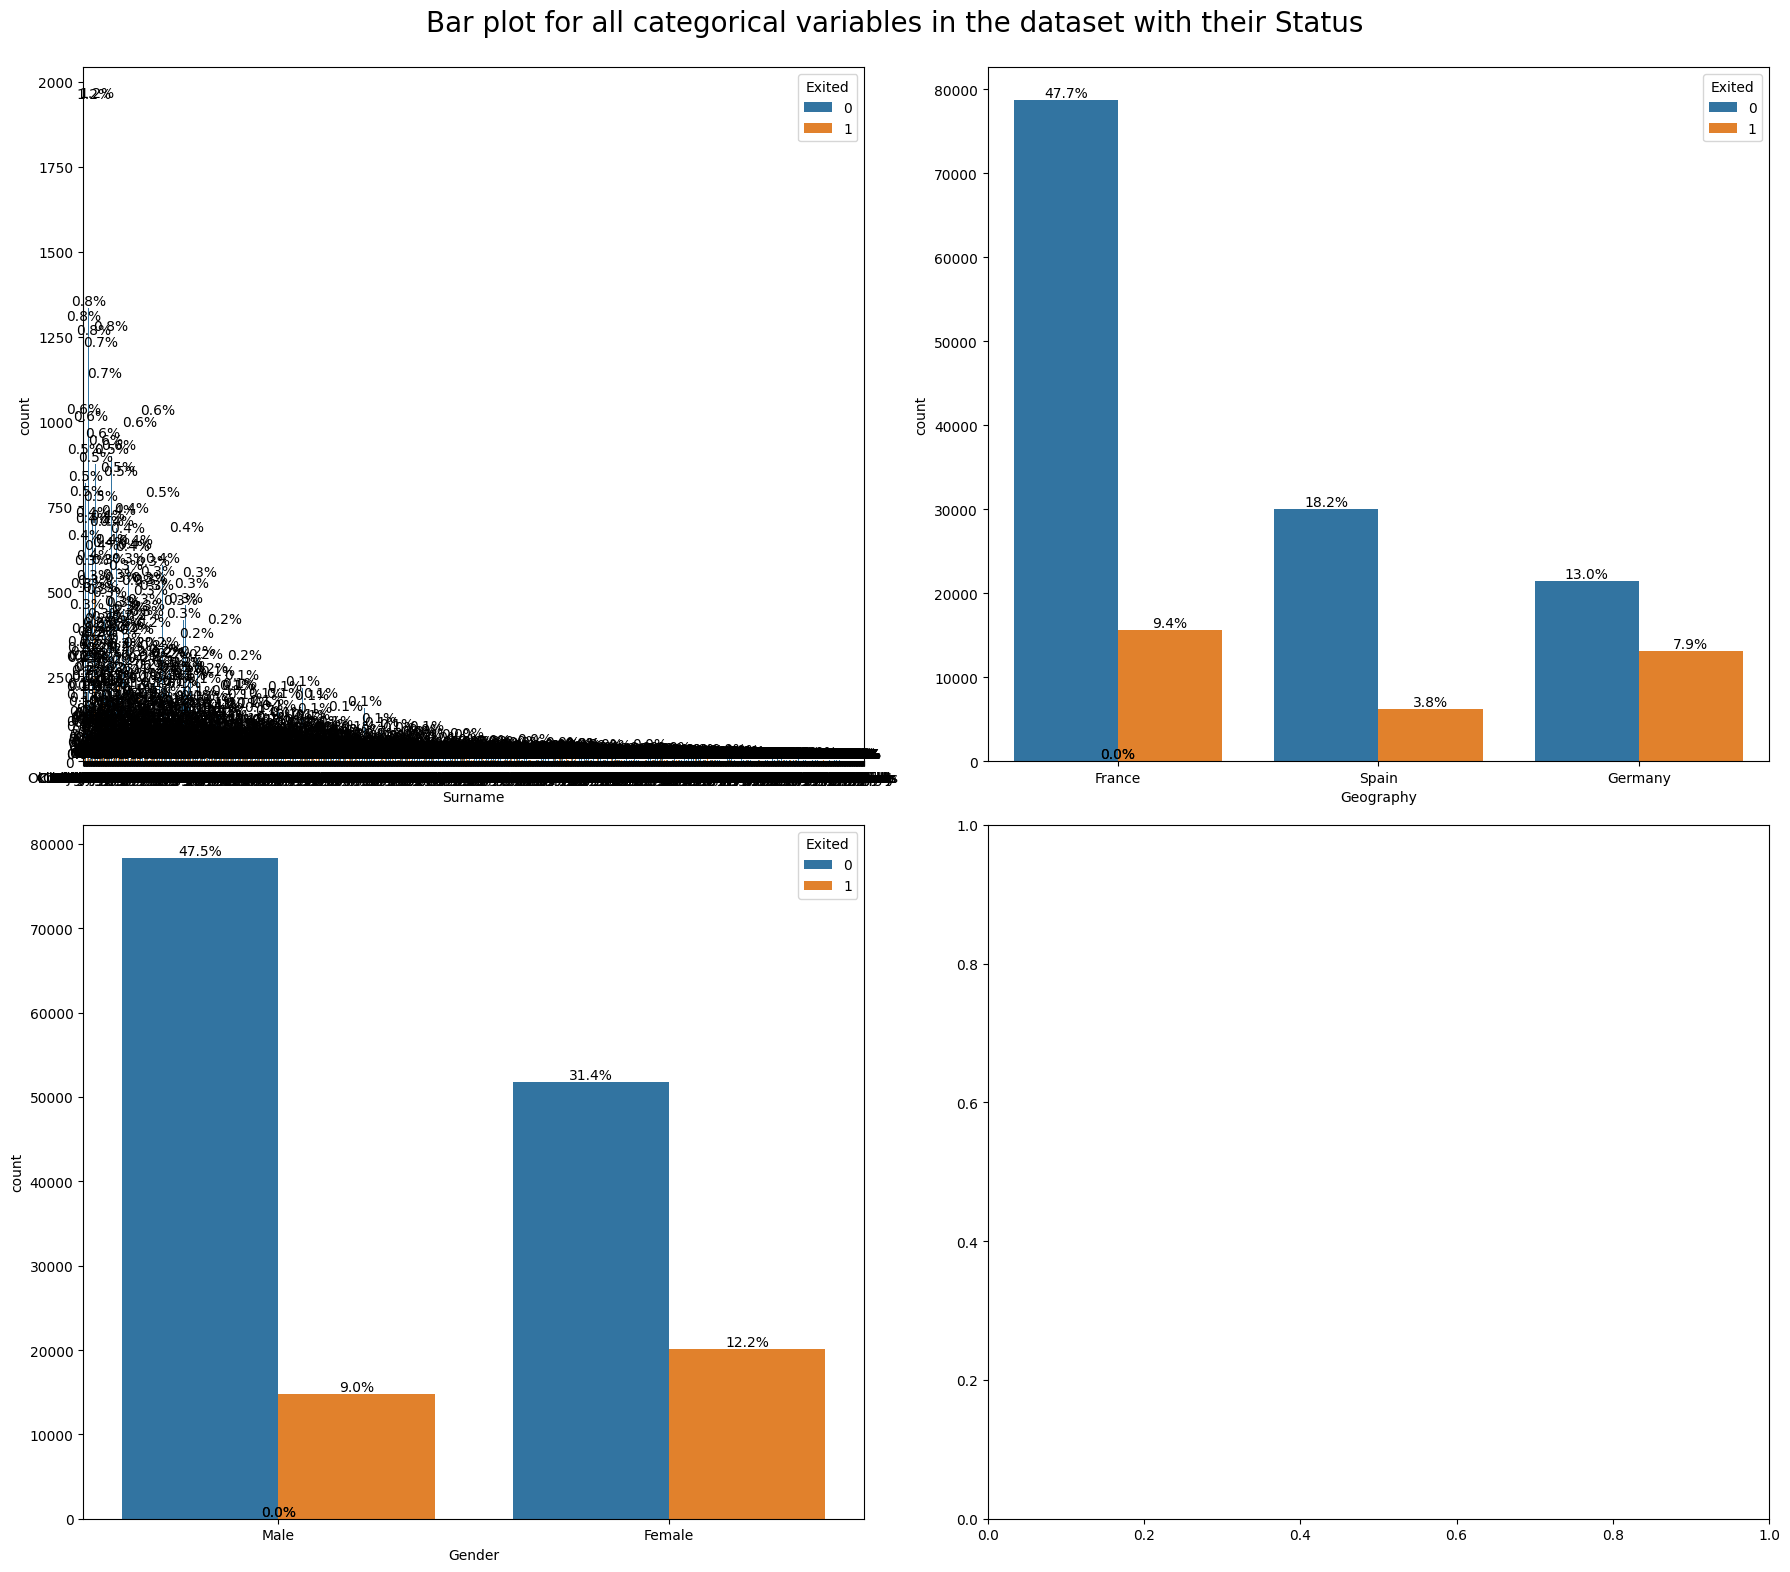

In [26]:
# Distribution of all Categorical columns
cat_col_train = df_train.select_dtypes(include=['object','category']).columns
print(f"Categorical Columns are : {cat_col_train}")
# Visualize Categorical columns 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 16))
# Increase vertical spacing
plt.subplots_adjust(hspace=0.5)
# Set the supertitle
fig.suptitle('Bar plot for all categorical variables in the dataset with their Status\n', fontsize=20)
# Adjust the spacing between the supertitle and subplots
plt.subplots_adjust(top=0.95)
# Iterate over the columns and create count plots
for i, column in enumerate(cat_col_train):
    row = i // 2
    col = i % 2
    sns.countplot(ax=axes[row, col], x=column, data=df_train , hue='Exited')
   
    total_count = len(df_train[column])

    for p in axes[row,col].patches:
        percentage = f'{100 * p.get_height() / total_count:.1f}%'
        x_pos = p.get_x() + p.get_width() / 2
        y_pos = p.get_height()
        axes[row,col].annotate(percentage, (x_pos, y_pos), ha='center', va='bottom')
# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

<Axes: >

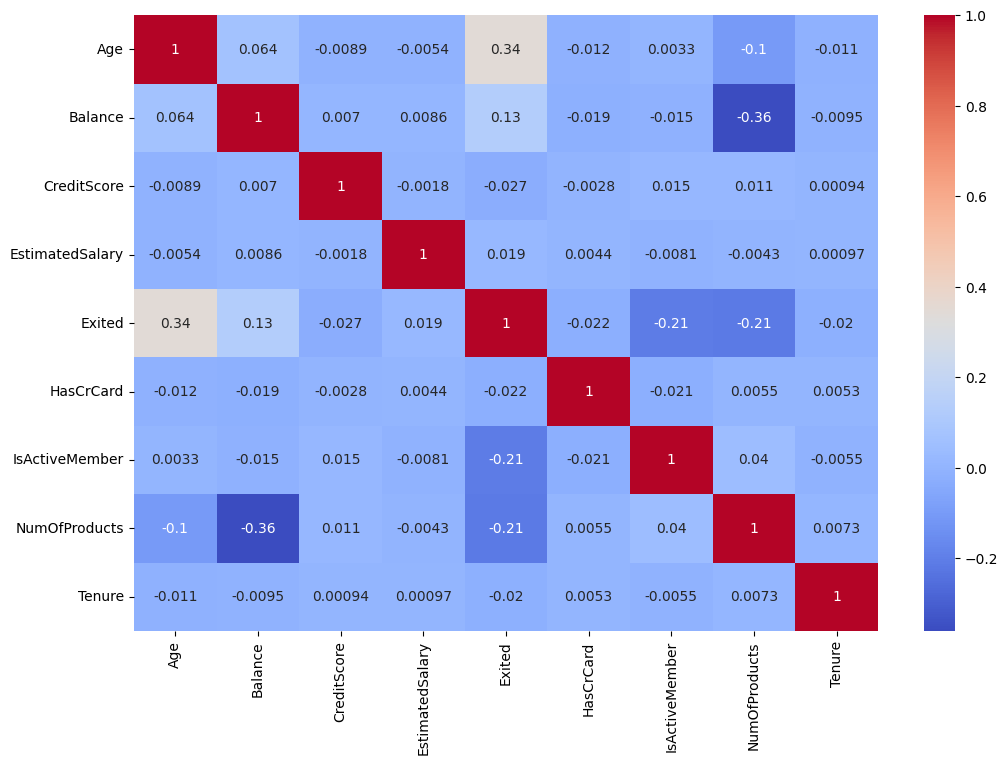

In [27]:
# Visualization of correlation in numerical columns
plt.figure(figsize=(12,8))
sns.heatmap(df_train[num_col_train].corr(),cbar = True, cmap='coolwarm', annot=True)

**Figure-:** Shows the Correlation of all Numerical Columns 

---
# Observation 3
There is no significance correlation in any numerical columns

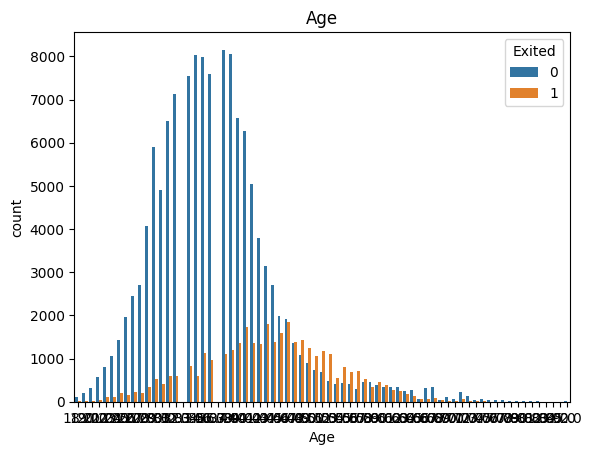

In [28]:
# Age Wise distribution
fig,ax=plt.subplots()
sns.countplot(data = df_train,x='Age',hue='Exited',ax=ax)
ax.set_title('Age')
plt.show()


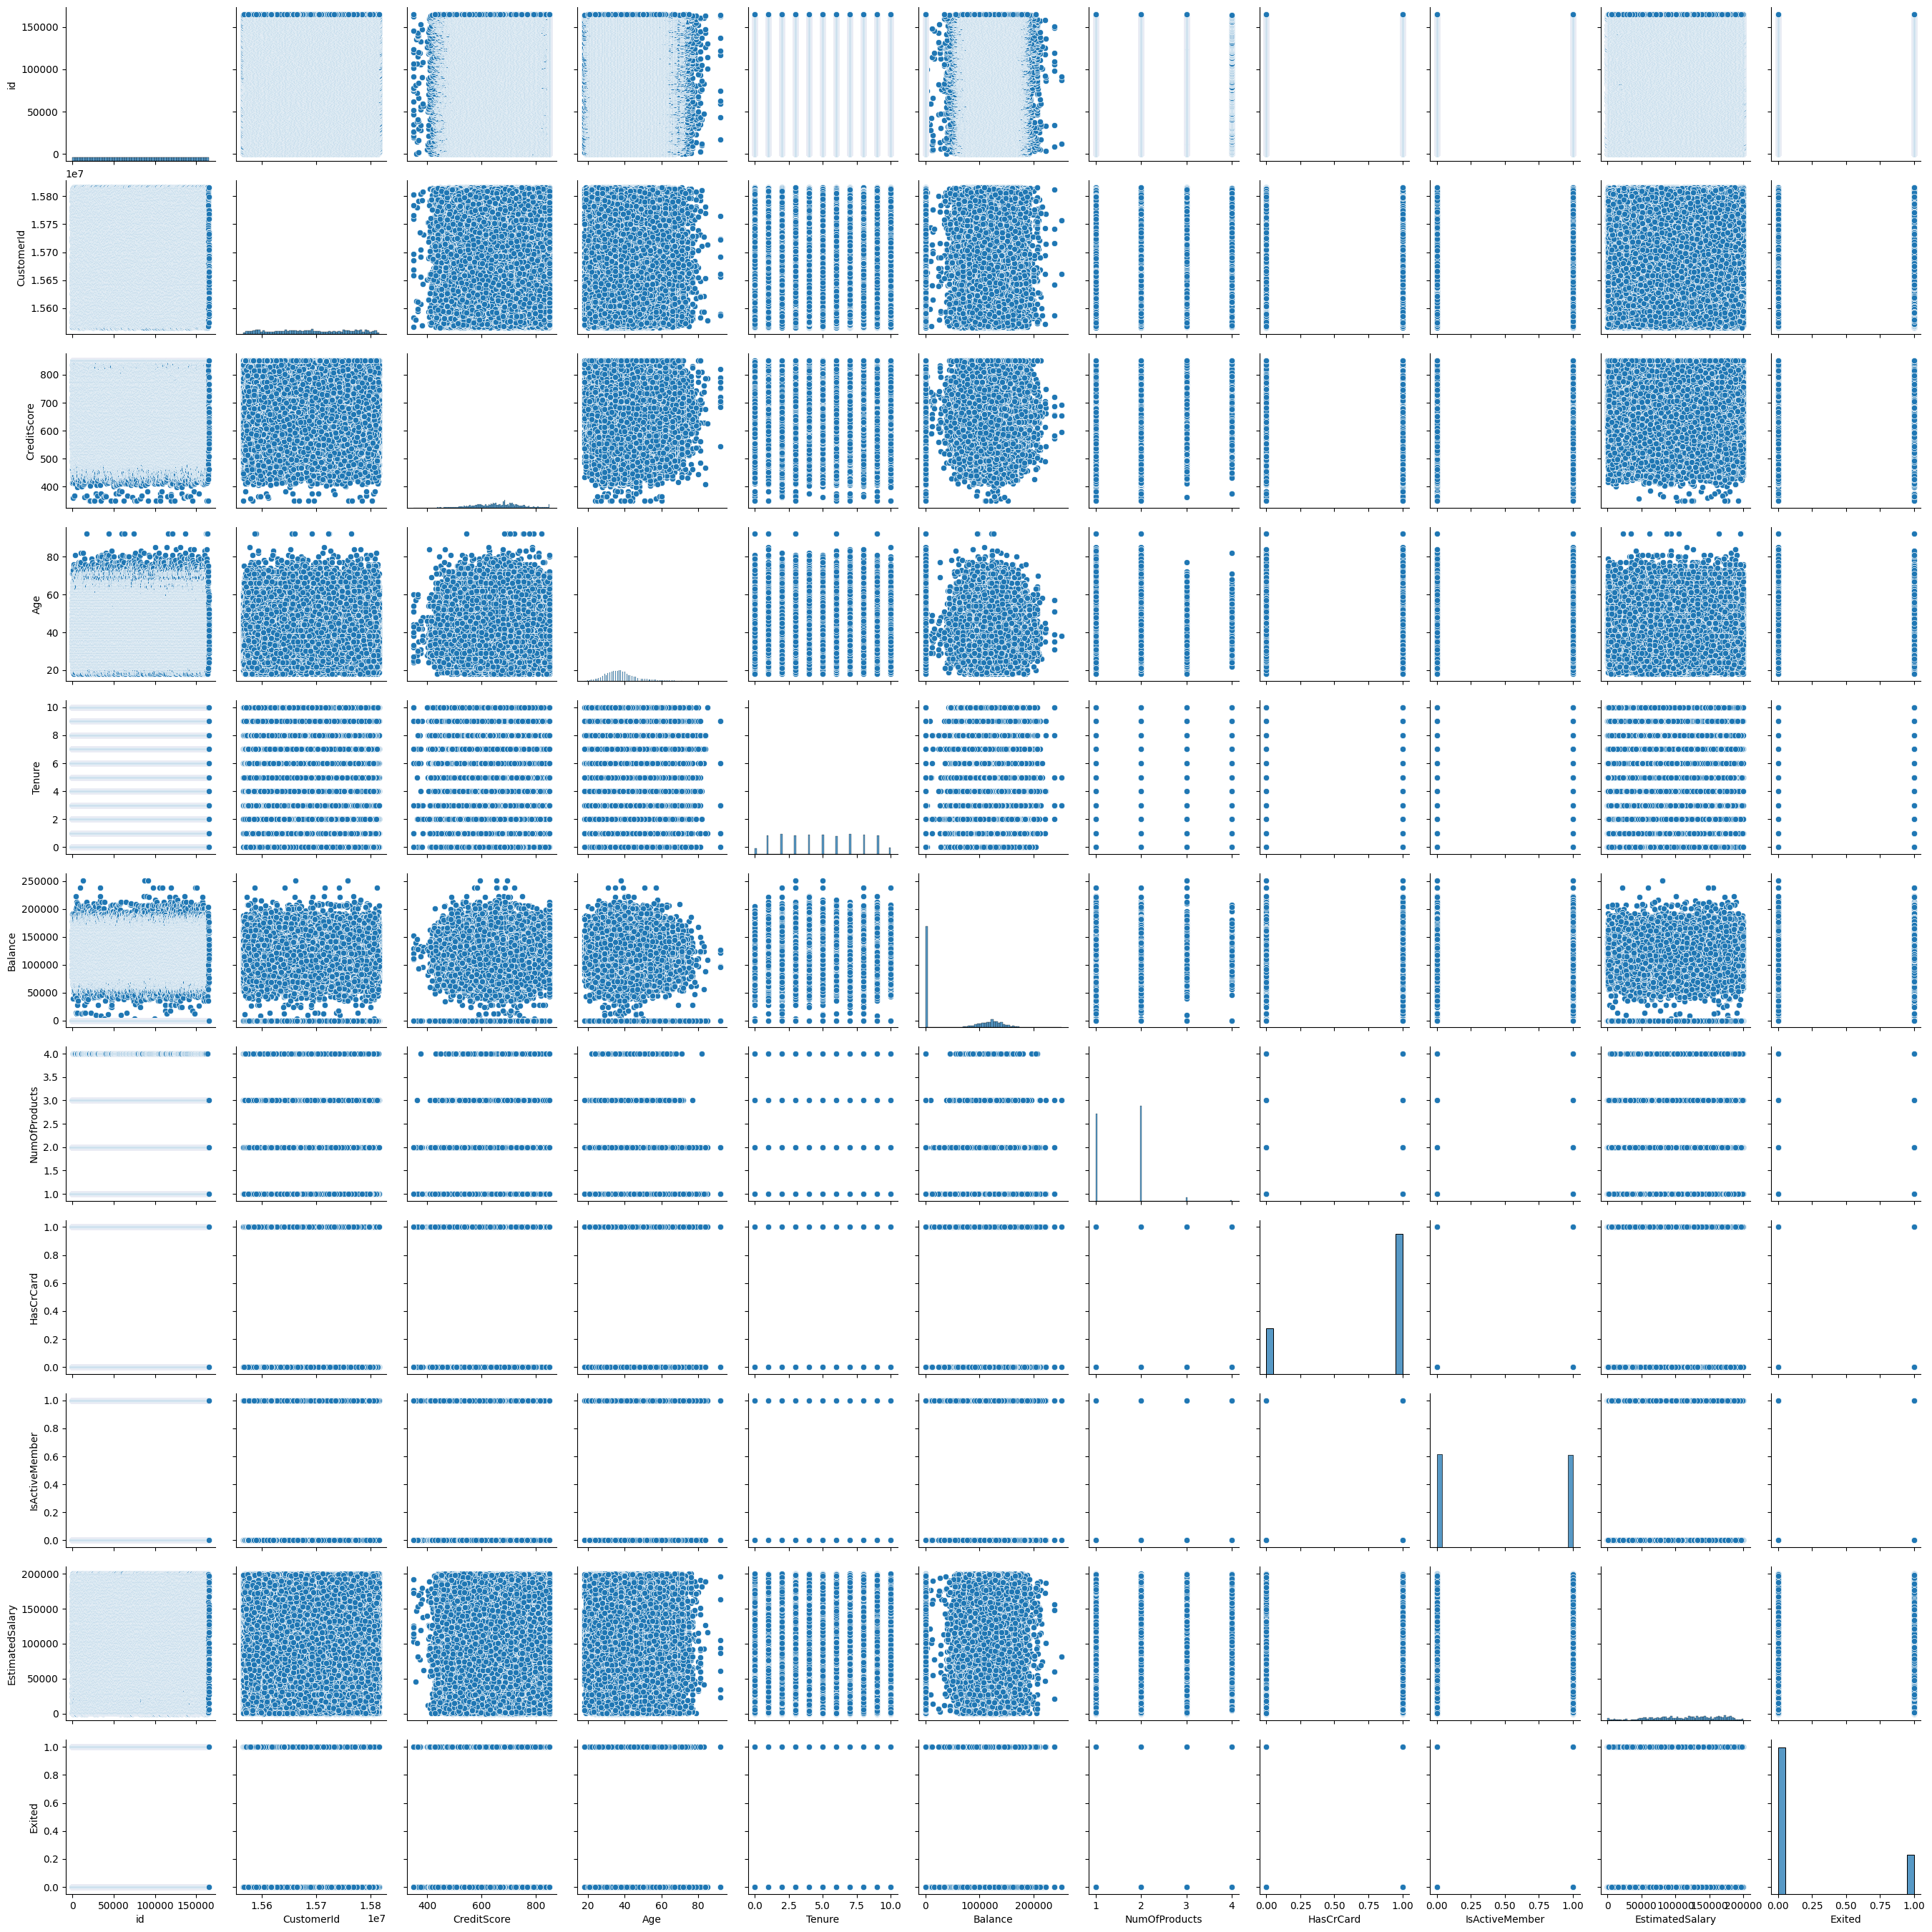

In [29]:
sns.pairplot(df_train)

In [30]:
import plotly.express as px
# piechart
# for i, col in enumerate(df_train.columns.difference('id'))
# df_pie = df_train['col'].value_counts().reset_index()
# df_pie.columns = ['Exited', 'count']
# fig_pie = px.pie(df_pie, values='count', names='Exited', title="Pie Plot showing distribution of the Bank Churn") 

# fig_pie.show()


In [31]:
df_train.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier 
#import grid search cv for cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, log_loss, make_scorer, roc_auc_score

In [34]:
# train test split of dataset in python
from sklearn.model_selection import train_test_split

# Splitting the DataFrame into features (X) and target variable (y)
X_train = df_train.drop(['Exited', 'id','CustomerId'], axis=1)  
y_train = df_train['Exited']  

X_test = df_test.drop(['id','CustomerId'], axis=1) 

# Splitting the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
X_test['Surname'].value_counts()

Surname
Hsia         1606
T'ien        1484
Hs?          1124
Maclean      1042
Ts'ui        1017
             ... 
Wallwork        1
Praed           1
Kentish         1
Younger         1
Distefano       1
Name: count, Length: 2708, dtype: int64

In [36]:
# Lets separate Numerical and categorical columns to visualize properly
num_col = X_train.select_dtypes(include=np.number).columns
cat_col = X_train.select_dtypes(include=['object']).columns

In [37]:
print(num_col)
print(cat_col)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')
Index(['Surname', 'Geography', 'Gender'], dtype='object')


In [38]:
# Create a dictionaries of list of models to evaluate performance with hyperparameters
models = { 
          'DecisionTreeClassifier' : (DecisionTreeClassifier(), {'criterion' : ['gini'],'max_depth': [None], 'splitter': ['best']}),
          'RandomForestClassifier' : (RandomForestClassifier(n_jobs= -1), {'criterion' : ['gini'],'n_estimators': [1000], 'max_depth': [None]}),
          'AdaBoostClassifier' : (AdaBoostClassifier(), {'n_estimators': [1000], 'algorithm': ['SAMME.R']}),
          # 'GradientBoostingClassifier' : (GradientBoostingClassifier(), {'criterion' : ['friedman_mse','squared_error'], 'n_estimators': [10]}),
          # 'XGBClassifier' : (XGBClassifier(), {'n_estimators': [10], 'learning_rate': [0.1]}),          
          }

# Define the column transformer for preprocessing
preprocessing = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), num_col),  # Replace with actual numeric column names
        ('categorical', OneHotEncoder(handle_unknown= 'infrequent_if_exist'), cat_col)  # Replace with actual categorical column name
    ])

# LogLoss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)
roc_score = make_scorer(roc_auc_score)
for name, (model, params) in models.items():
    # create a pipline
    # pipeline = GridSearchCV(model, params, cv=5)
    pipeline = Pipeline([
     ('preprocess', preprocessing),
     ('Imputer', SimpleImputer()),
     ('classify', GridSearchCV(model, params, cv=4, verbose=3, scoring=roc_score))
    ])
    # fit the pipeline
    pipeline.fit(X_train, y_train)
    
    # make prediction from each model
    y_pred = pipeline.predict(X_test)
    
    y_pred_prob = pipeline.predict_proba(X_test)
    # print the performing metric
    # Calculate accuracy
    print(f"Model Name: {name}")
    print("Best Parameters: ", pipeline.named_steps['classify'].best_params_)
    print("Best Score: ", pipeline.named_steps['classify'].best_score_)
    print("Best Estimator: ", pipeline.named_steps['classify'].best_estimator_)
   # print("Best Roc Score: ", pipeline.named_steps['classify'].roc_auc_score)
   
    
   

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=gini, max_depth=None, splitter=best;, score=0.721 total time=  44.6s
[CV 2/5] END criterion=gini, max_depth=None, splitter=best;, score=0.718 total time=  38.8s
[CV 3/5] END criterion=gini, max_depth=None, splitter=best;, score=0.720 total time=  38.2s
[CV 4/5] END criterion=gini, max_depth=None, splitter=best;, score=0.725 total time=  43.2s
[CV 5/5] END criterion=gini, max_depth=None, splitter=best;, score=0.718 total time= 1.6min
Model Name: DecisionTreeClassifier
Best Parameters:  {'criterion': 'gini', 'max_depth': None, 'splitter': 'best'}
Best Score:  0.720269729489042
Best Estimator:  DecisionTreeClassifier()
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=gini, max_depth=None, n_estimators=10;, score=0.703 total time=  18.3s
[CV 2/5] END criterion=gini, max_depth=None, n_estimators=10;, score=0.705 total time=  13.3s
[CV 3/5] END criterion=gini, max_depth=None, n_

In [41]:
# Lets predict the test data
y_pred_prob = pipeline.predict_proba(X_test)
y_pred_prob

array([[0.59662602, 0.40337398],
       [0.46932507, 0.53067493],
       [0.56868853, 0.43131147],
       ...,
       [0.58499137, 0.41500863],
       [0.54980468, 0.45019532],
       [0.51607434, 0.48392566]])

---
# Observation 4
1st column shows probability of no Exit and 2nd column shows probability of Exited, therefore we append the value of exited(2nd column)

In [60]:
print(df_test.shape)
df_test.head()

(110023, 13)


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [68]:
result = df_test[['id']]
print(result.shape)
result

(110023, 1)


,id
0,165034
1,165035
2,165036
3,165037
4,165038
...,...
110018,275052
110019,275053
110020,275054
110021,275055


In [47]:
# Checking classes of classifier/Exited
pipeline.named_steps['classify'].classes_

array([0, 1], dtype=int64)

In [63]:
# data of 2nd column from array 
y_pred_prob[:,1]

array([0.40337398, 0.53067493, 0.43131147, ..., 0.41500863, 0.45019532,
       0.48392566])

In [64]:
# Convert array into series
pd.Series(y_pred_prob[:,1])

0         0.403374
1         0.530675
2         0.431311
3         0.474419
4         0.490737
            ...   
110018    0.426687
110019    0.455309
110020    0.415009
110021    0.450195
110022    0.483926
Length: 110023, dtype: float64

In [69]:
result.shape

(110023, 1)

In [70]:
type(result)

pandas.core.frame.DataFrame

In [71]:
y_pred_prob.shape

(110023, 2)

In [72]:
# Add `Exited` column in result dataset
result['Exited']= pd.Series(y_pred_prob[:,1])
result

C:\Users\ishra\AppData\Local\Temp\ipykernel_15000\1783277930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Exited']= pd.Series(y_pred_prob[:,1])


,id,Exited
0,165034,0.403374
1,165035,0.530675
2,165036,0.431311
3,165037,0.474419
4,165038,0.490737
...,...,...
110018,275052,0.426687
110019,275053,0.455309
110020,275054,0.415009
110021,275055,0.450195


In [74]:
result.head()

,id,Exited
0,165034,0.403374
1,165035,0.530675
2,165036,0.431311
3,165037,0.474419
4,165038,0.490737


In [75]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      110023 non-null  int64  
 1   Exited  110023 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.7 MB


In [76]:
result.to_csv('submission.csv', index= False)